Libraries and loading the data

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# Loading the data
data = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\projects\BondYeild_Prediction\normalized_bonddata.csv')

print(data.head())

         DATE        FF    INDPRO       CPI       VIX  DGS10
0  2000-01-01  0.832049  0.660264  0.250000  0.248763   6.66
1  2000-02-01  0.875193  0.653061  0.258278  0.256376   6.52
2  2000-03-01  0.893683  0.658463  0.306291  0.239627   6.26
3  2000-04-01  0.919877  0.671369  0.276490  0.324134   5.99
4  2000-05-01  0.958398  0.661465  0.294702  0.309098   6.44


Data Cleaning and Preprocessin

In [13]:
# convering dates to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Splitting features and target
X = data[['FF','CPI','INDPRO','VIX']]
Y = data['DGS10']

# Reshaping X for LSTM input
X_scaled = np.reshape(X.values, (X.shape[0], 1, X.shape[1]))

# Time-based split (train:2000-2020, test:2020-2024)
train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]




Building the LSTM-Dense Hybrid Model



In [14]:
#defining the model
model = Sequential()

#LSTM Layers
model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, activation='relu', return_sequences= False))
model.add(Dropout(0.2))

#Dense Layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))

#Output layer
model.add(Dense(units=1))

#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


c:\Users\vinee\OneDrive\Desktop\projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 15.4080 - val_loss: 5.5617
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.9758 - val_loss: 5.4242
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.0288 - val_loss: 5.2668
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.1115 - val_loss: 5.0830
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.8034 - val_loss: 4.8633
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.3537 - val_loss: 4.5950
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.8287 - val_loss: 4.2580
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.7761 - val_loss: 3.8335
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9588 - val_loss: 3.2957
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.1025 - val_loss: 2.6191
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.2671 - val_loss: 1.8122
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.2034 - val_los

Predictions and Evaluation of the Model


In [15]:
# Make predictions on the test data
Y_pred = model.predict(X_test).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A763C5F6A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
Mean Squared Error: 1.0814001118421972
Mean Absolute Error: 0.9103640700181325


Visualize Actual vs Predicted bond yields


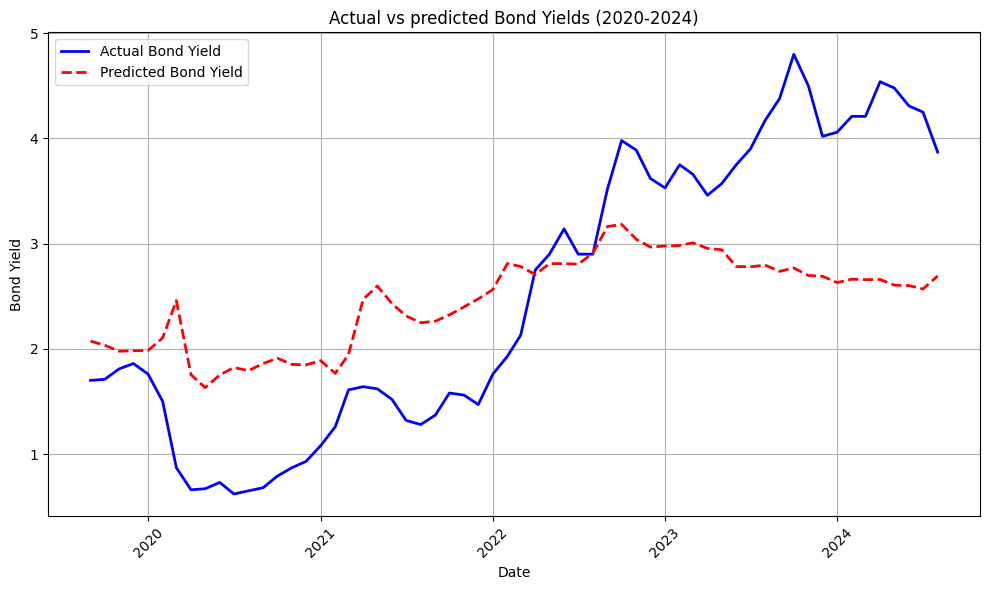

In [16]:
# Plot actual vs predicted bond yields
plt.figure(figsize=(10,6))
plt.plot(data['DATE'][train_size:], Y_test, label='Actual Bond Yield', color='blue', linewidth=2)
plt.plot(data['DATE'][train_size:], Y_pred, label='Predicted Bond Yield', color='red',linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.title('Actual vs predicted Bond Yields (2020-2024)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()